<a href="https://colab.research.google.com/github/shiissaa/MAT422/blob/main/3_5%2B3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.5 K-Means**

k-means clustering is a popular method of vector quantization that aims to
partition n observations into k clusters in which each observation belongs
to the cluster with the nearest mean (cluster centers or cluster centroid),
serving as a prototype of the cluster. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances. While k-means general converge quickly to a local optimum, the problem is computationally diﬀicult (NP-hard).

K-means Clustering Algorithm:

1) Clusters the data into k groups where k is predefined.

2) Select k points at random as cluster centers.

3) Assign objects to their closest cluster center according to the Euclidean
distance function.


4) Calculate the centroid or mean of all objects in each cluster.

5) Repeat steps 2, 3 and 4 until the same points are assigned to each cluster
in consecutive rounds.

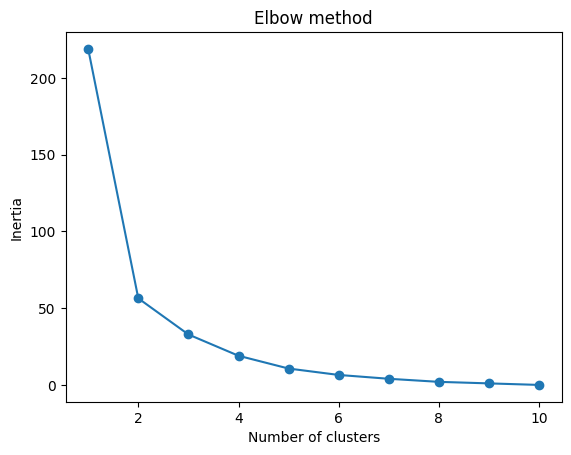

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
inertias = []

# Find k-value (where it becomes more linear i.e. the elbow)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


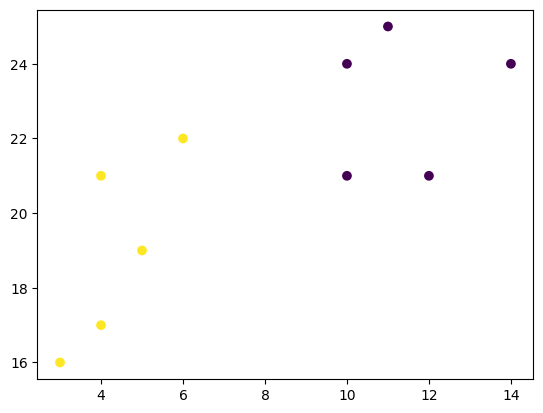

In [4]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

**3.6 Support Vector Machine**

Support-vector machines (SVMs) are supervised learning models in machine
learning, which aim to analyze data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other. The objective of the support vector machine algorithm is to find a hyperplane in a high dimensional space of the number of features that distinctly classifies the data points. An SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

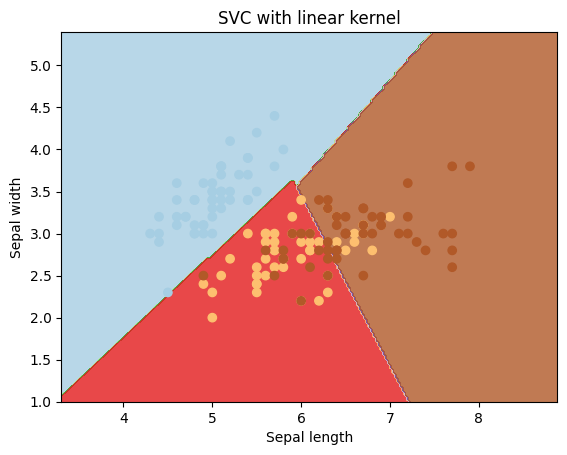

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
C = 1.0
svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()